<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**: Parnian Taheri

**Student ID**: 99106352

# Effect of Overfitting

In this exercise, we want to examine the effect of **overfitting**. As you learned in class, using too many features in training can result in a model with very low loss on the training set but high loss on the validation and test set. For this purpose, we have prepared a dataset in the `q2-train.npy`, `q2-valid.npy`, and `q2-test.npy` files for you. We know that `y` is a polynomial function of `x` in this dataset, meaning that 

$$
y = \sum_{i=0}^{k}a_ix^i
$$

However, we do not know the exact value of `k`.

## Importing Libraries

First, we import the necessary libraries for this assignment. Please note that you should only use these libraries and no other libraries are acceptable.

In [117]:
import numpy as np
import matplotlib.pyplot as plt

## Reading Data and Preprocessing

In this part of the assignment, you should read data from the `.npy` files. The data in `q2-train.npy` file is your training set and should be stored in the `X_train` and `Y_train` variables. Similarly, the data in `q2-valid.npy` file is your validation set, and the data in `q2-test.npy` file is your test set, which should be stored in `X_val`, `Y_val`, `X_test`, and `Y_test` respectively. You can use the `np.load` function to read the `.npy` files.

In [118]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
data = np.load("q2-train.npy")
X_train = data[:,0][:,np.newaxis]
Y_train = data[:,1][:,np.newaxis]

data = np.load("q2-valid.npy")
X_val = data[0:,0][:,np.newaxis]
Y_val = data[0:,1][:,np.newaxis]

data = np.load("q2-test.npy")
X_test = data[0:,0][:,np.newaxis]
Y_test = data[0:,1][:,np.newaxis]

### END CODE HERE ###

To find the best value of `k`, we want to change `k` from 1 to 12 and examine its effect on the validation set, and then choose the right value of `k`. For this purpose, we need to create a matrix with columns equal to $x^0$, $x^1$, $x^2$, ..., $x^k$ for every value of `k`. You can complete the following function to do this job. The function takes an $m \times 1$ vector `X` containing values of input `x` and returns an $m \times (k+1)$ matrix that has the properties mentioned above.

In [119]:
def create_matrix(X):
    '''
    X: an m by 1 array 
    '''
    new_X = None
    ### START CODE HERE ###
    k = 12
    new_X = np.hstack([np.power(X,i) for i in range(k+1)])
    ### END CODE HERE ###
    return new_X

## Validate Model

Now, we want to train our model for every value of `k`. You can use any of the methods that we used in **Question 1** (gradient descent or direct calculation) for this purpose. The following function trains our model on the training set for a given value of `k`, and then returns the loss on the training set and validation set, as well as the weight vector `w`.

In [120]:
# If you need any other function for training write it here
def direct_method(X, Y):
    '''
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    '''
    w = None
    ### START CODE HERE ###
    w = np.linalg.pinv(X.T@X)@X.T@ Y
    ### END CODE HERE ###
    return w

def loss(X, Y, w):
    '''
    X: an m by (n+1) matrix which includes inputs
    Y: an m by 1 vector which includes heating loads
    w: an (n+1) by 1 weight vector
    '''
    m, n = X.shape
    loss = None
    ### START CODE HERE ###
    diff = (X @ w) - Y
    squared_diff = diff ** 2
    loss = squared_diff.mean()
    #print(loss)
    ### END CODE HERE ###
    return loss
# (like gradient descent or anything else)

In [121]:
def train(X_train, Y_train, X_val, Y_val, k):
    '''
    X_train: an m_train by 1 vector contains training points
    Y_train: an m_train by 1 vector contains training values
    X_val: an m_val by 1 vector contains validation points
    Y_val: an m_val by 1 vector contains validation values
    k: degree of polynomial
    '''
    w, loss_train, loss_val = None, None, None
    ### START CODE HERE ###
    X_train_new = create_matrix(X_train)[:,0:k+1]   
    X_val_new = create_matrix(X_val)[:,0:k+1]   
    
    w = direct_method(X_train_new, Y_train)
    
    loss_train = loss(X_train_new, Y_train, w)
    
    loss_val = loss(X_val_new, Y_val, w)
    ### END CODE HERE ###
    return w, loss_train, loss_val

In the cell below, you can change the value of `k` between 1 and 12 and plot the loss on the training and validation set as a function of `k` in the same plot.

**Question**: Discuss about the effect of $k$.

**Answer**: As k increases, the "validation loss" increases and the "train loss" decreases.

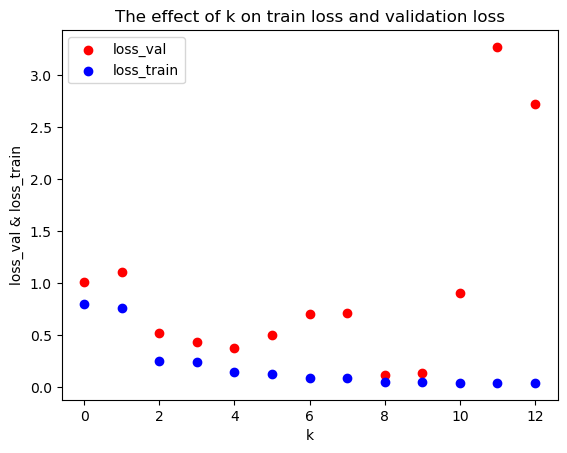

In [122]:
### START CODE HERE ###
k = 12
for i in range(0,k+1):
    w, loss_train, loss_val = train(X_train, Y_train, X_val, Y_val, i)
    scatter = plt.scatter(i,loss_val,c='r')
    plt.scatter(i,loss_train,c='b')

plt.legend(["loss_val", "loss_train"], loc ="upper left")
plt.title("The effect of k on train loss and validation loss")
plt.xlabel("k")
plt.ylabel("loss_val & loss_train")    
plt.show()
### END CODE HERE ###

## Evaluating Model

In the cell below find the loss of your best model on the test set.

**Question**: Why we need test set?

**Answer**: To make sure that our model fitted just right based on train and validation set.

In [123]:
### START CODE HERE ###
k = 8
w, loss_train, loss_test = train(X_train, Y_train, X_test, Y_test, k)
print("loss_test = ",loss_test)
### END CODE HERE ###

loss_test =  0.11791424797244696
